# XGB - Gradient Boosting with German Credit data

Gradient boosting: is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Based on data of German Credit that already clean up and prepared

### Resources and References
https://github.com/f2005636/Ensemble/blob/master/04%20XGB.ipynb

In [5]:
#Load related libraries to do analysis
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline
from sklearn.model_selection import train_test_split

## Machine Learning Part

# machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#to check performance of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

#plot
import matplotlib.pyplot as plt

In [6]:
# Impor data dari excel xls german credit versi encoded (sudah dalam angka semua) ke Python
final_data = pd.read_excel('input/german_credit_encoded.xlsx')

In [18]:
x = final_data.drop(['default'],axis=1)
y = final_data['default']

# Need to change the name since the xgb model require string only in variable names
x.columns = ["act_0DM","act_200DM/salary","act_none","cre_his_critical/other_existing","cre_his_delay","cre_his_paid","cre_his_none/paid","purpose_business","purpose_car(new)","purpose_car(used)","purpose_appli","purpose_education","purpose_furniture","purpose_radio/television","purpose_repairs","purpose_retraining","sav_100DM","sav100_500DM","sav500_1000DM","sav_unknown","emp_1year","emp_1_4years","emp_4_7years","emp_unemployed","male:divorced","male:married","male:single","debtors_guarantor","debtors_none","prop_other","prop_realestate","prop_unknown","other_ins_none","other_inst_stores","hous_own","hous_rent","job_employee","job_unemployed","job_unskilled","phone_yes","foreign_yes","category_duration","category_duration2","duration_in_month","credit_amount","installment_income","present_residence","age","credit_this_bank","people_maintenance","cicilan_per_bulan"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

<AxesSubplot:>

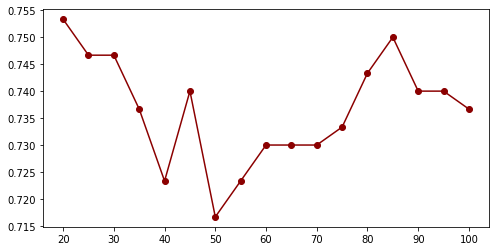

In [20]:
# Finding the most optimum n estimate
# which is the the highest accuracy value
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = XGBClassifier(objective='binary:logistic', n_estimators=trees, seed=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

<AxesSubplot:>

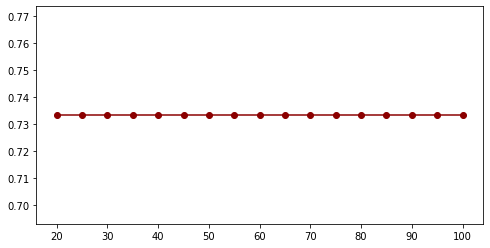

In [22]:
# Finding the most optimum n estimaor
# which is the the highest accuracy value
# update the parameters with the best values

results = []
n_max_depth = [2,4,6,8,10,12,14,16,18,20]
for trees in n_estimaor_options:
    model = XGBClassifier(objective='binary:logistic', n_estimators=85, max_depth = trees, seed=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

In [23]:
# XGB - Predictions and Evaluation

xgb = XGBClassifier(objective='binary:logistic', n_estimators=85, seed=101)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=85, n_jobs=0, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
predicted = xgb.predict_proba(x_test)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(predicted)],axis=1)
test_calc.rename(columns={1: 'predicted'}, inplace=True)

max f:  0.3
max a:  0.3


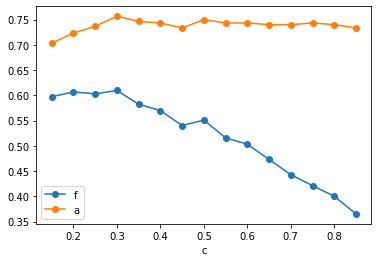

In [25]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['default'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_f = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max f: ",max_f)
print ("max a: ",max_a)

In [28]:
# Change if x > value to the max a
y_pred = xgb.predict_proba(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={1: 'predicted'}, inplace=True)
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.3 else 0)

print('\033[1m' + '\033[4m' + 'accuracy' + '\033[0m')
print(round(np.mean(test_calc['default']==test_calc['predicted'])*100,2),"%")
print('\n')
print('\033[1m' + '\033[4m' + 'classification_report' + '\033[0m')
print(classification_report(test_calc['default'],test_calc['predicted']))
print('\n')
print('\033[1m' + '\033[4m' + 'confusion_matrix' + '\033[0m')
print(confusion_matrix(test_calc['default'],test_calc['predicted']))

accuracy
75.67 %


classification_report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       204
           1       0.63      0.59      0.61        96

    accuracy                           0.76       300
   macro avg       0.72      0.71      0.72       300
weighted avg       0.75      0.76      0.75       300



confusion_matrix
[[170  34]
 [ 39  57]]


## Cost-Profit Consideration

Ultimately these statistical decisions must be translated into profit consideration for the bank. Let us assume that a correct decision of the bank would result in 35% profit at the end of 5 years. A correct decision here means that the bank predicts an application to be good or credit-worthy and it actually turns out to be credit worthy. When the opposite is true, i.e. bank predicts the application to be good but it turns out to be bad credit, then the loss is 100%. If the bank predicts an application to be non-creditworthy, then loan facility is not extended to that applicant and bank does not incur any loss (opportunity loss is not considered here). The cost matrix, therefore, is as follows:


In [29]:
df_table = confusion_matrix(test_calc['default'],test_calc['predicted'])
anc_pnc = df_table[0,0]
anc_pc = df_table[0,1]
ac_pnc = df_table[1,0]
ac_pc = df_table[1,1]

print("profit: ",(-1 * anc_pc + 0.35 * ac_pc))

profit:  -14.05
